In [155]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import svm

from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

## 1) Data Wrangling

In [156]:
df = pd.read_csv("./Wine_Quality_Classification/WineQT.csv")
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
0         9.4        5     0  
1         9.8        5     1  
2         9.8        5     2  
3         9.8        6     3  
4         9.4        5     4  
...       ...      ...   ...  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597  

[1143 rows x 13 columns]

In [157]:
df=df.drop(['Id'], axis=1)
df['quality'] = df['quality']-3

In [158]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        2  
1      9.8        2  
2      9.8        2  
3      9.8        3  
4      9.4        2

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [160]:
df.shape[0]

1143

In [161]:
df.shape[1]

12

In [162]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [163]:
df['quality'].nunique()

6

In [164]:
df['quality'].unique()

array([2, 3, 4, 1, 5, 0], dtype=int64)

In [165]:
df['quality'].value_counts()/len(df)

quality
2    0.422572
3    0.404199
4    0.125109
1    0.028871
5    0.013998
0    0.005249
Name: count, dtype: float64

In [166]:
#df.describe()[1:].T.style.background_gradient(cmap='Blues')
df.describe()[1:].T

mean        std      min       25%       50%  \
fixed acidity          8.311111   1.747595  4.60000   7.10000   7.90000   
volatile acidity       0.531339   0.179633  0.12000   0.39250   0.52000   
citric acid            0.268364   0.196686  0.00000   0.09000   0.25000   
residual sugar         2.532152   1.355917  0.90000   1.90000   2.20000   
chlorides              0.086933   0.047267  0.01200   0.07000   0.07900   
free sulfur dioxide   15.615486  10.250486  1.00000   7.00000  13.00000   
total sulfur dioxide  45.914698  32.782130  6.00000  21.00000  37.00000   
density                0.996730   0.001925  0.99007   0.99557   0.99668   
pH                     3.311015   0.156664  2.74000   3.20500   3.31000   
sulphates              0.657708   0.170399  0.33000   0.55000   0.62000   
alcohol               10.442111   1.082196  8.40000   9.50000  10.20000   
quality                2.657043   0.805824  0.00000   2.00000   3.00000   

                            75%        max  
fixed acidity          9.100000   15.90000  
volatile acidity       0.640000    1.58000  
citric acid            0.420000    1.00000  
residual sugar         2.600000   15.50000  
chlorides              0.090000    0.61100  
free sulfur dioxide   21.000000   68.00000  
total sulfur dioxide  61.000000  289.00000  
density                0.997845    1.00369  
pH                     3.400000    4.01000  
sulphates              0.730000    2.00000  
alcohol               11.100000   14.90000  
quality                3.000000    5.00000

## 2) Data Visualization

In [167]:
df_category=df.copy()
df_category=df_category.sort_values(by='quality', ascending=True)

In [168]:
df_category["Quality Category"]=df_category["quality"]
df_category["Quality Category"].replace({0: "Terrible", 1: "Very Poor", 2: "Poor", 3: "Good", 4: "Very Good", 5: "Excellent"}, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_444\3425236563.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_category["Quality Category"].replace({0: "Terrible", 1: "Very Poor", 2: "Poor", 3: "Good", 4: "Very Good", 5: "Excellent"}, inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_444\3781976004.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax[1] = sns.countplot(x="Quality Category", data=df_category, palette=['#EBEDEF','#85929E', '#34495E', '#566573', '#5D6D7E','#AEB6BF'])


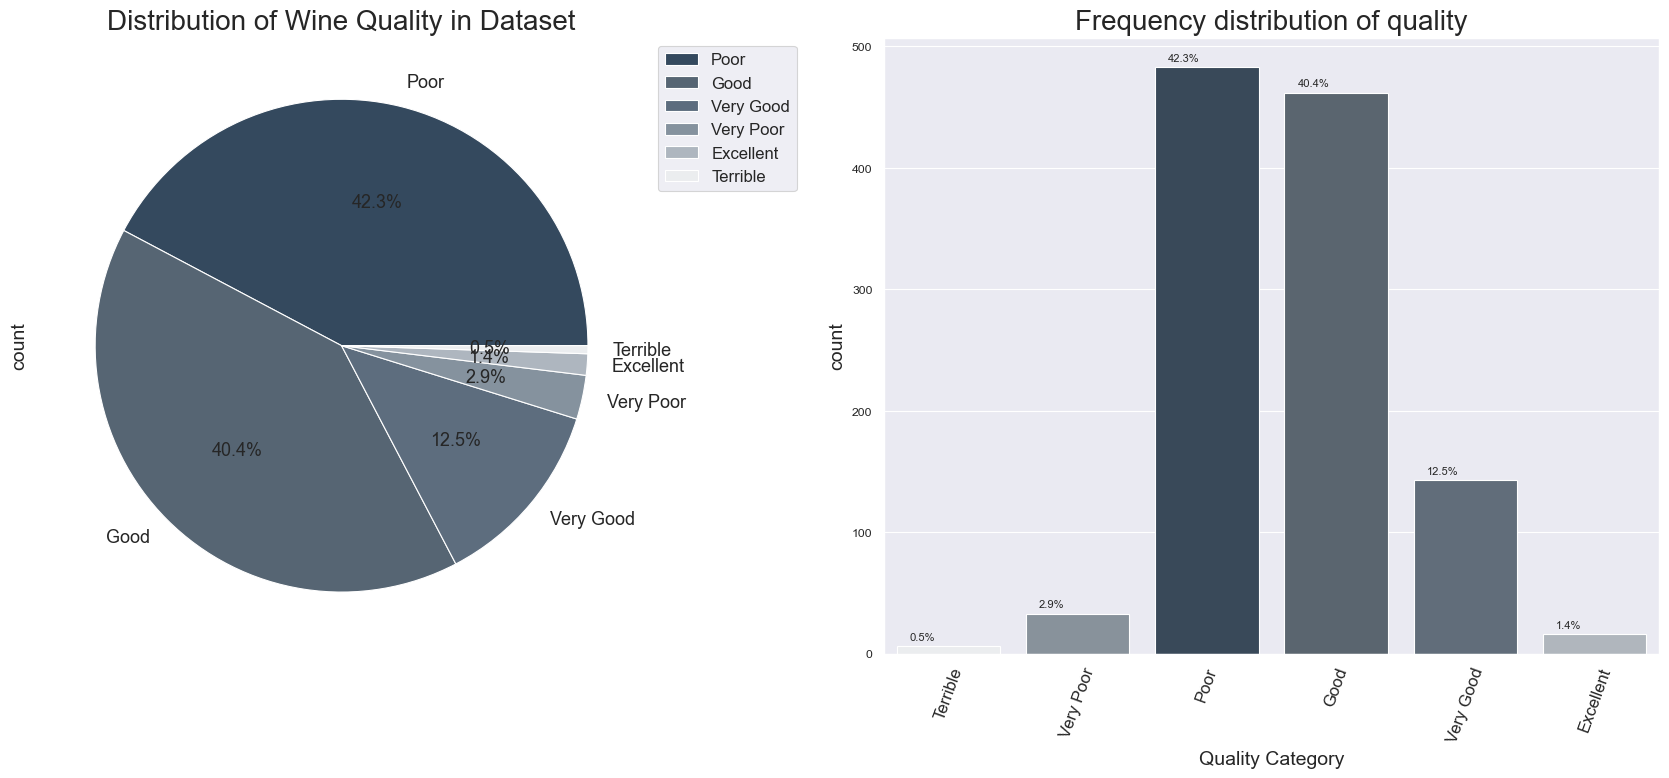

In [169]:
# visualize frequency distribution of quality

f,ax=plt.subplots(1,2,figsize=(22,8))

ax[0] = df_category["Quality Category"].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], fontsize=13, colors = ['#34495E','#566573', '#5D6D7E', '#85929E', '#AEB6BF','#EBEDEF'])
ax[0].set_title("Distribution of Wine Quality in Dataset", fontsize=20)
ax[0].legend(bbox_to_anchor=(1, 1), fontsize=12)



#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="Quality Category", data=df_category, palette=['#EBEDEF','#85929E', '#34495E', '#566573', '#5D6D7E','#AEB6BF'])
ax[1].set_title("Frequency distribution of quality", fontsize=20)

for p in ax[1].patches:
    ax[1].annotate('{:.1f}%'.format(100*p.get_height()/len(df_category['Quality Category'])), (p.get_x()+0.1, p.get_height()+5))

plt.xticks(rotation=70, fontsize=12)
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":20,"axes.labelsize":14})   

plt.show()

In [170]:
quality_table={}

In [171]:
quality_table['Values']=[0,1,2,3,4,5]

In [172]:
df_comparison = pd.DataFrame.from_dict(quality_table).T
df_comparison.columns = ['Terrible', 'Very Poor', 'Poor', 'Good', 'Very Good', 'Excellent']

df_comparison.style.background_gradient(cmap='Blues')

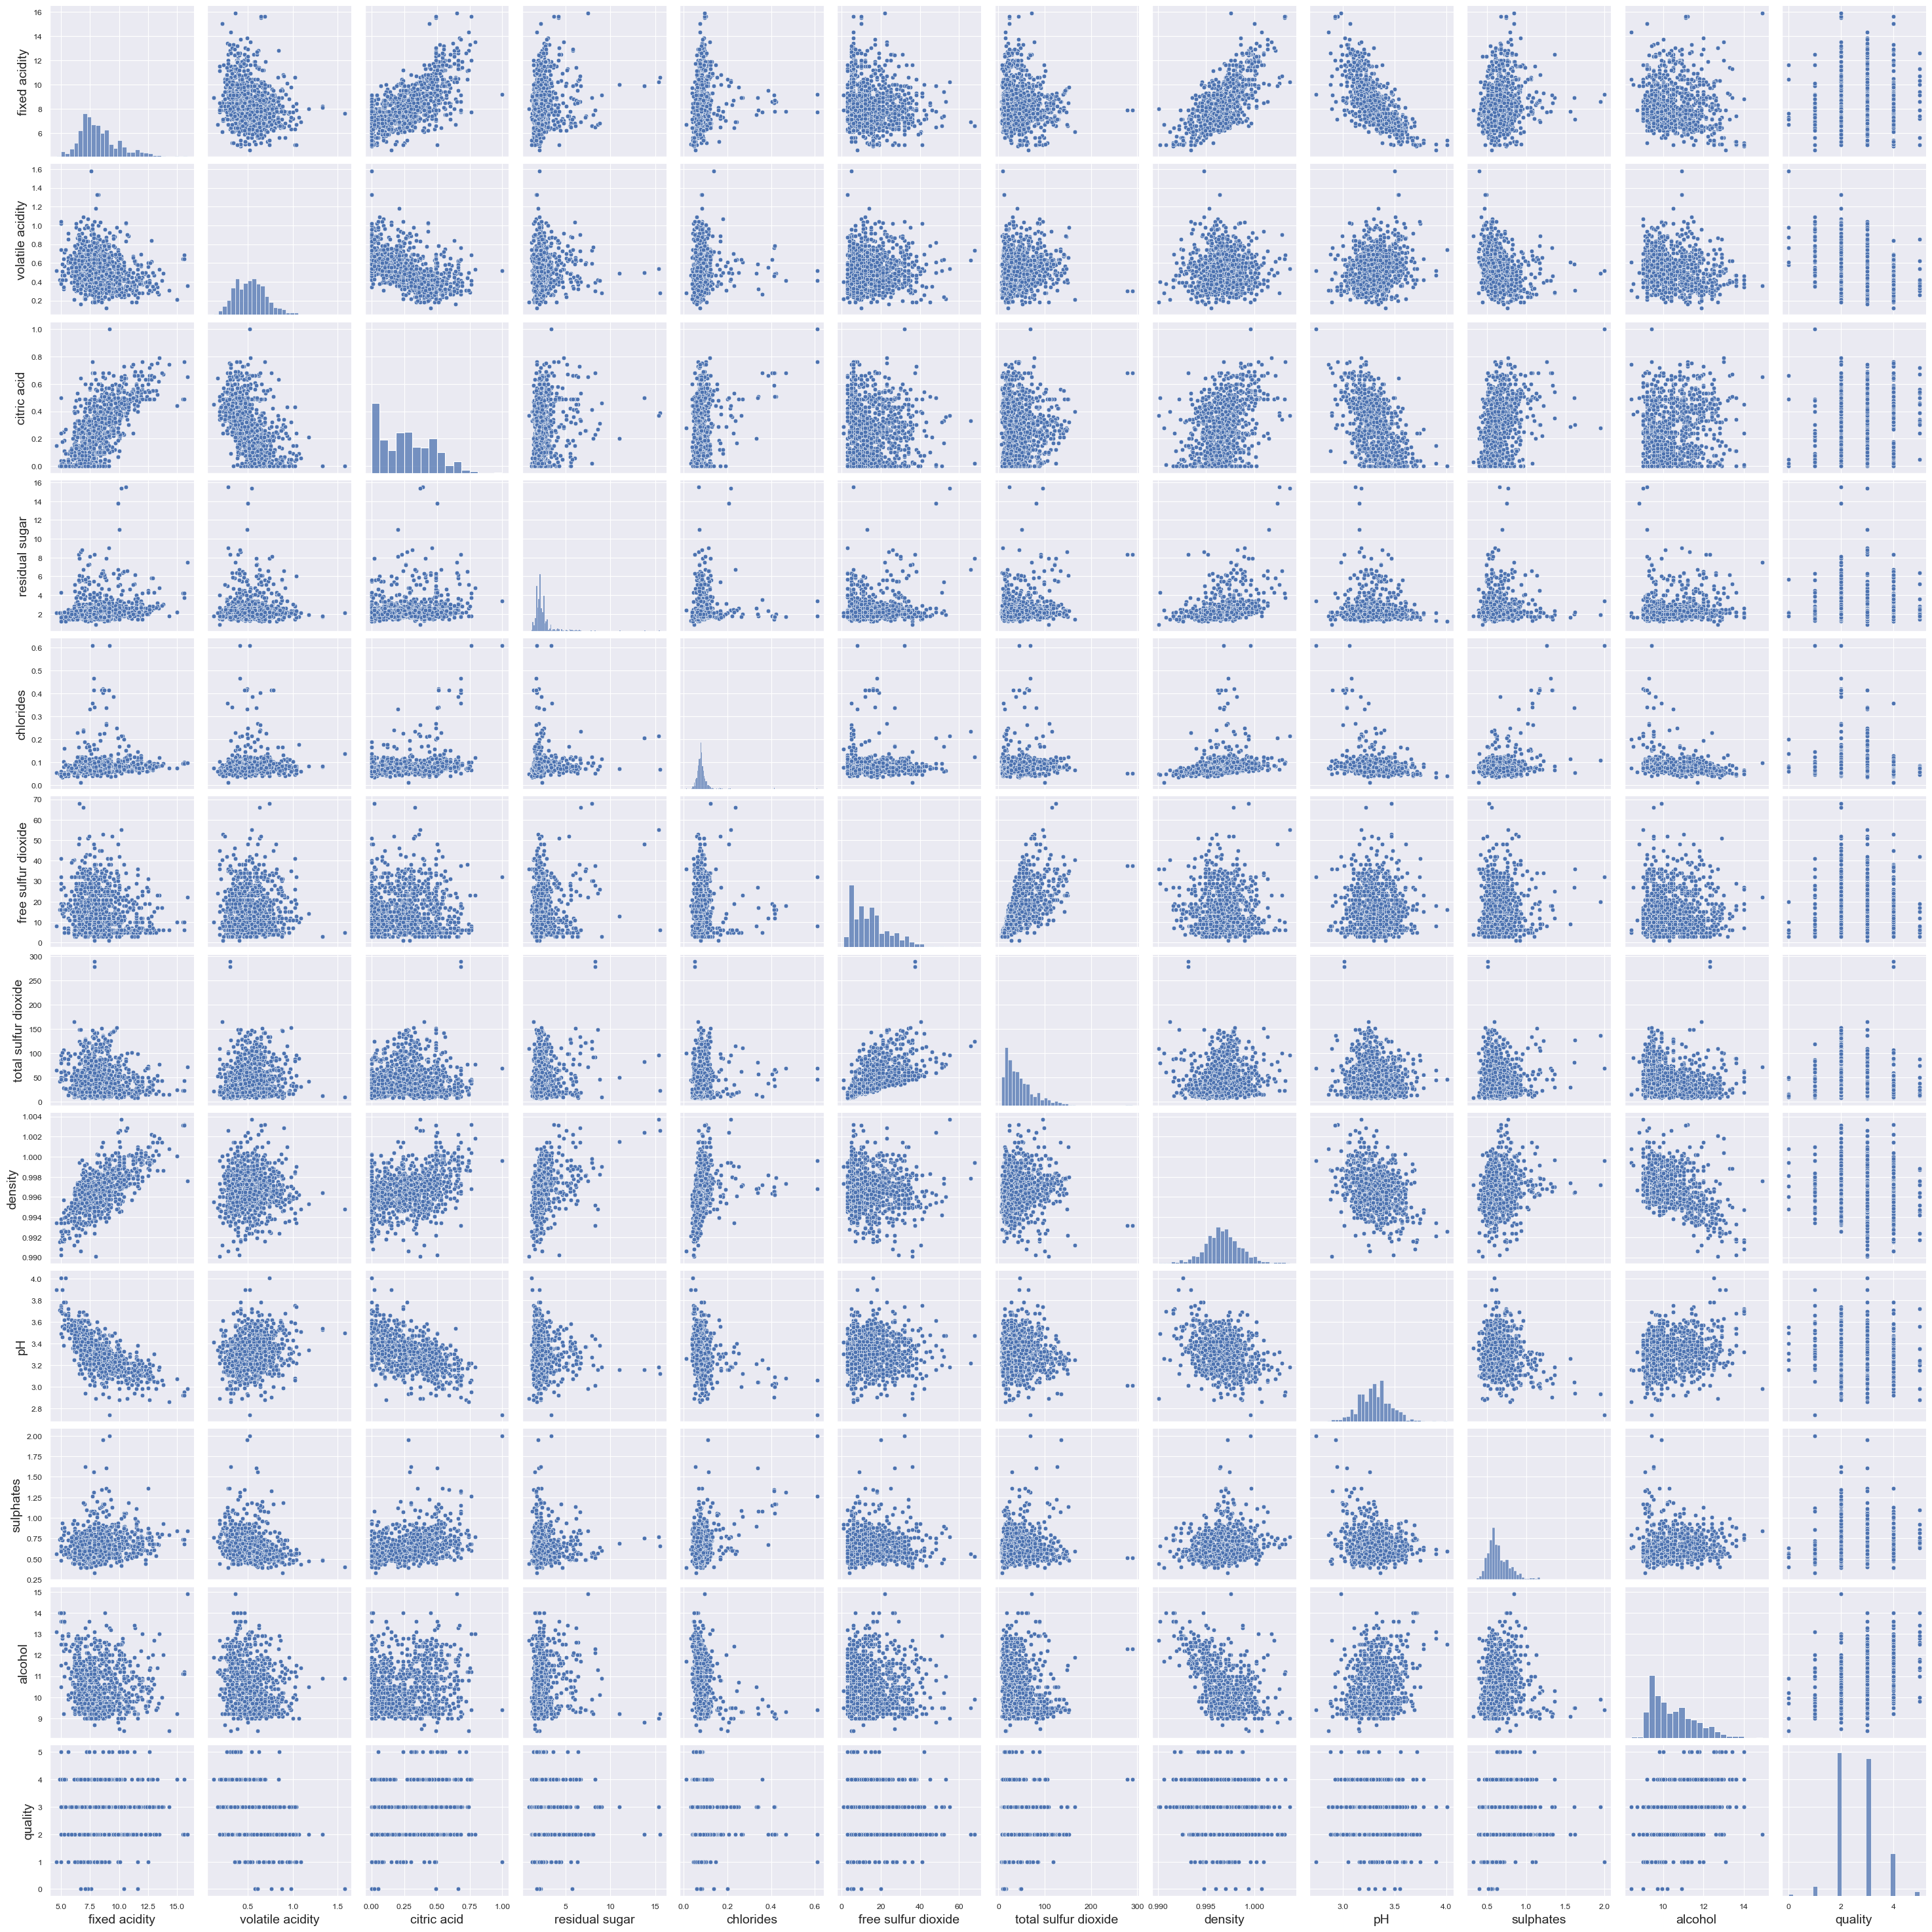

In [173]:
sns.pairplot(df)
plt.show()

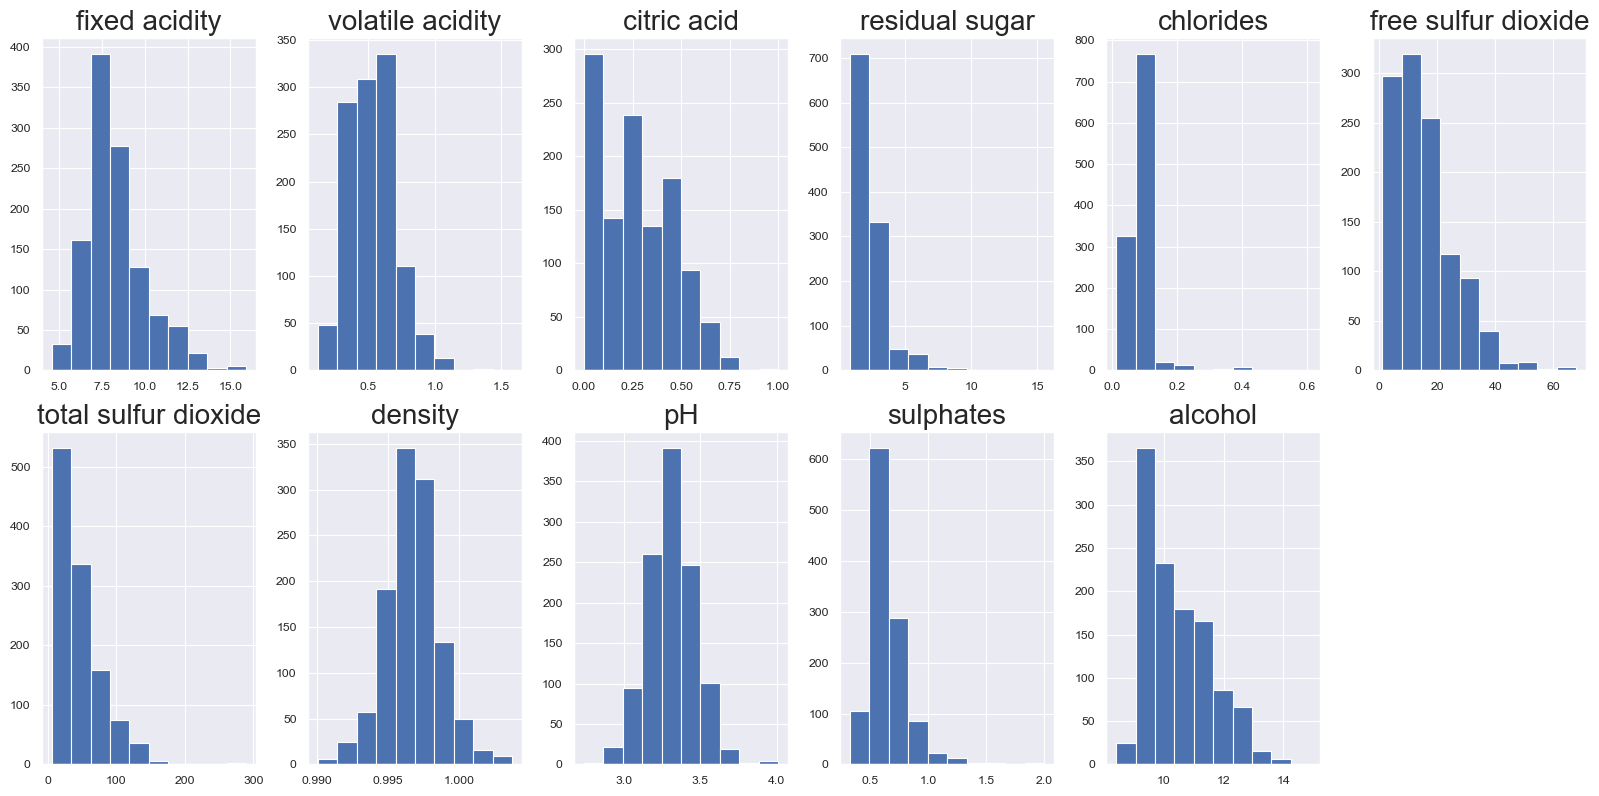

In [174]:
fig = plt.figure(figsize=(16,8))

gs1 = gridspec.GridSpec(2, 6)
axs = []
for c, num in zip(df.columns, range(1,12)):
    axs.append(fig.add_subplot(gs1[num - 1]))
    axs[-1].hist(df[c])
    plt.title(c)

    
plt.tight_layout()
plt.show()

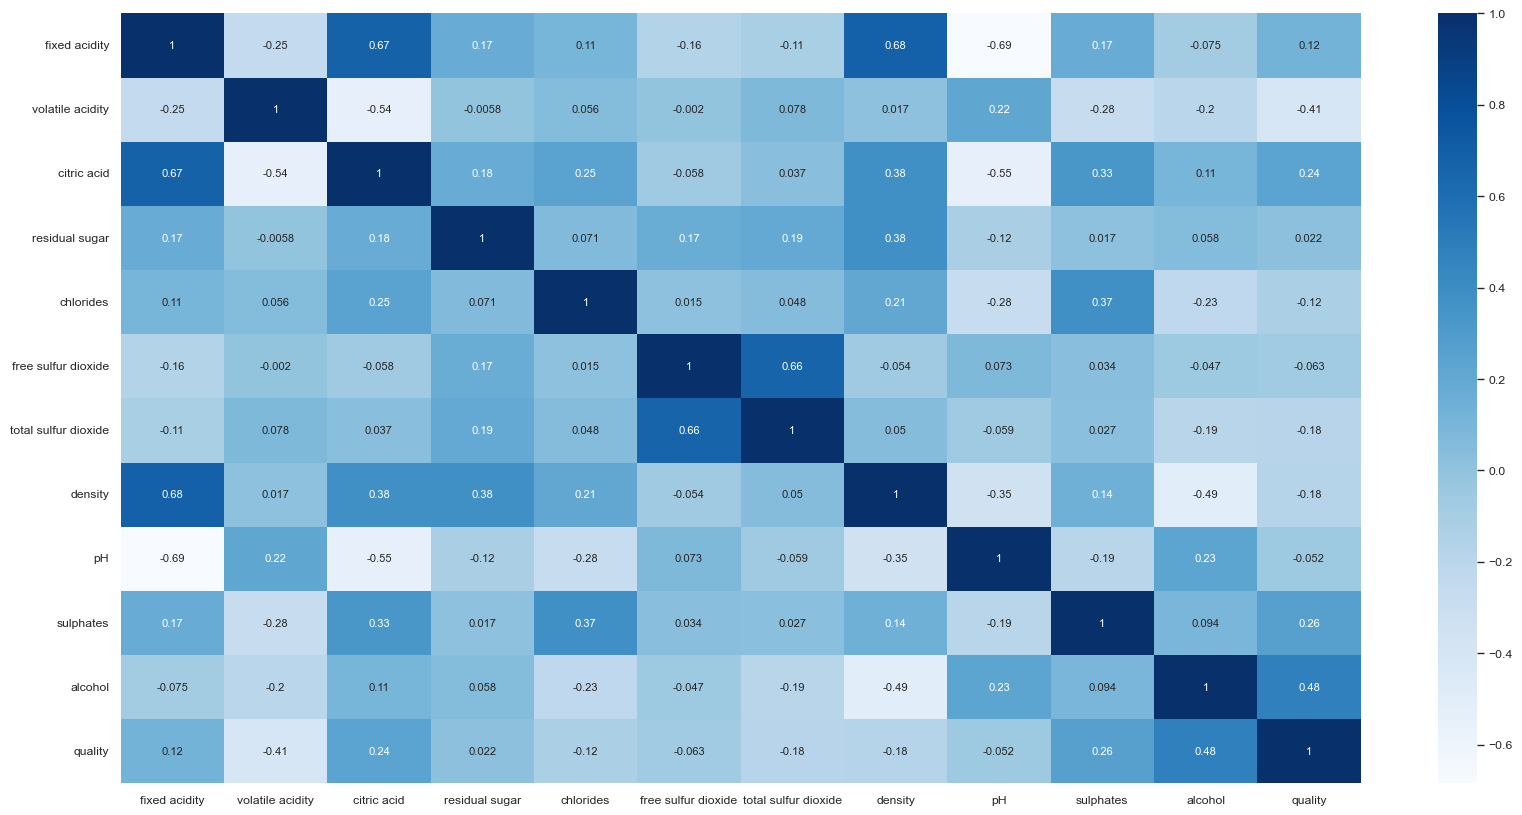

In [175]:
plt.figure(figsize=(20,10))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='Blues')
plt.show()

In [176]:
plt.figure(figsize=(15,8))
df_corr_bar = abs(df.corr()['quality']).sort_values()[:-1]
# sns.barplot(df_corr_bar.index,df_corr_bar.values,palette="Blues_d").set_title('Feature Correlation Distribution According to Quality', fontsize=20)
# plt.xticks(rotation=70, fontsize=14)
df_corr_bar.index

Index(['residual sugar', 'pH', 'free sulfur dioxide', 'fixed acidity',
       'chlorides', 'density', 'total sulfur dioxide', 'citric acid',
       'sulphates', 'volatile acidity', 'alcohol'],
      dtype='object')

<Figure size 1500x800 with 0 Axes>

C:\Users\Admin\AppData\Local\Temp\ipykernel_444\2104269366.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(x="Quality Category", y="volatile acidity", data=df_category, palette=['#34495E','#566573', '#5D6D7E', '#85929E', '#AEB6BF','#EBEDEF'])


Text(0, 0.5, 'Volatile Acidity')

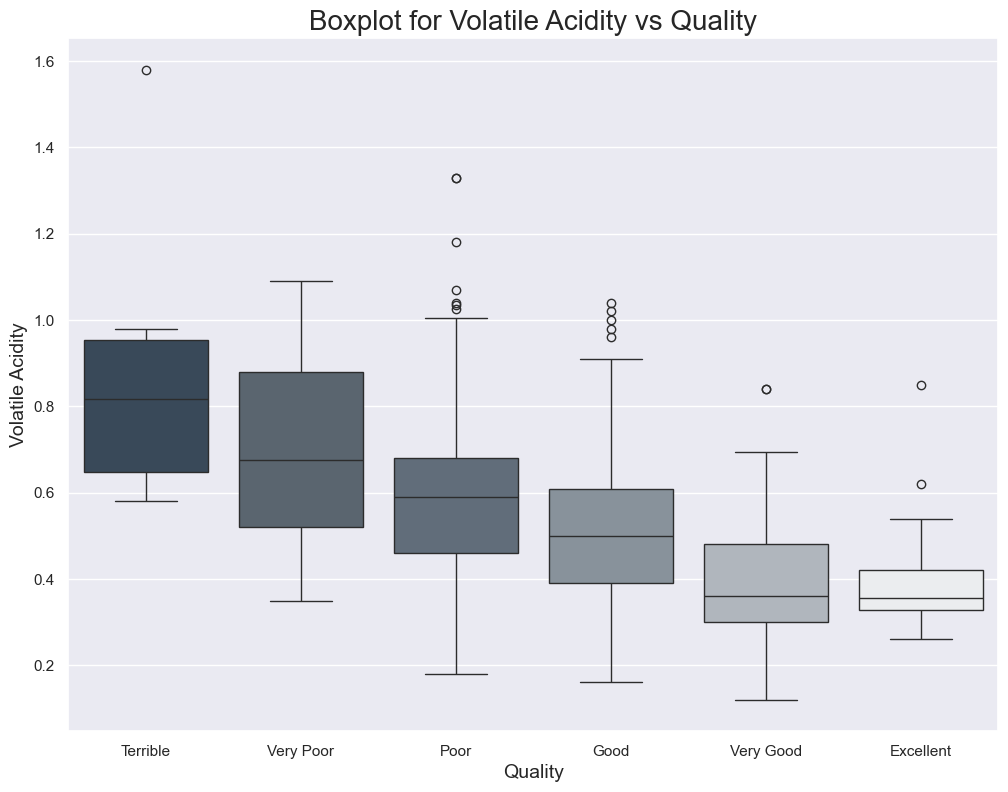

In [177]:
sns.set(rc={'figure.figsize':(12,9)})


ax=sns.boxplot(x="Quality Category", y="volatile acidity", data=df_category, palette=['#34495E','#566573', '#5D6D7E', '#85929E', '#AEB6BF','#EBEDEF'])
ax.set_title('Boxplot for Volatile Acidity vs Quality', fontsize=20)
ax.set_xlabel('Quality',fontsize=14)
ax.set_ylabel('Volatile Acidity',fontsize=14)

C:\Users\Admin\AppData\Local\Temp\ipykernel_444\3525748351.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(x="Quality Category", y="alcohol", data=df_category, palette=['#34495E','#566573', '#5D6D7E', '#85929E', '#AEB6BF','#EBEDEF'])


Text(0, 0.5, 'Alcohol')

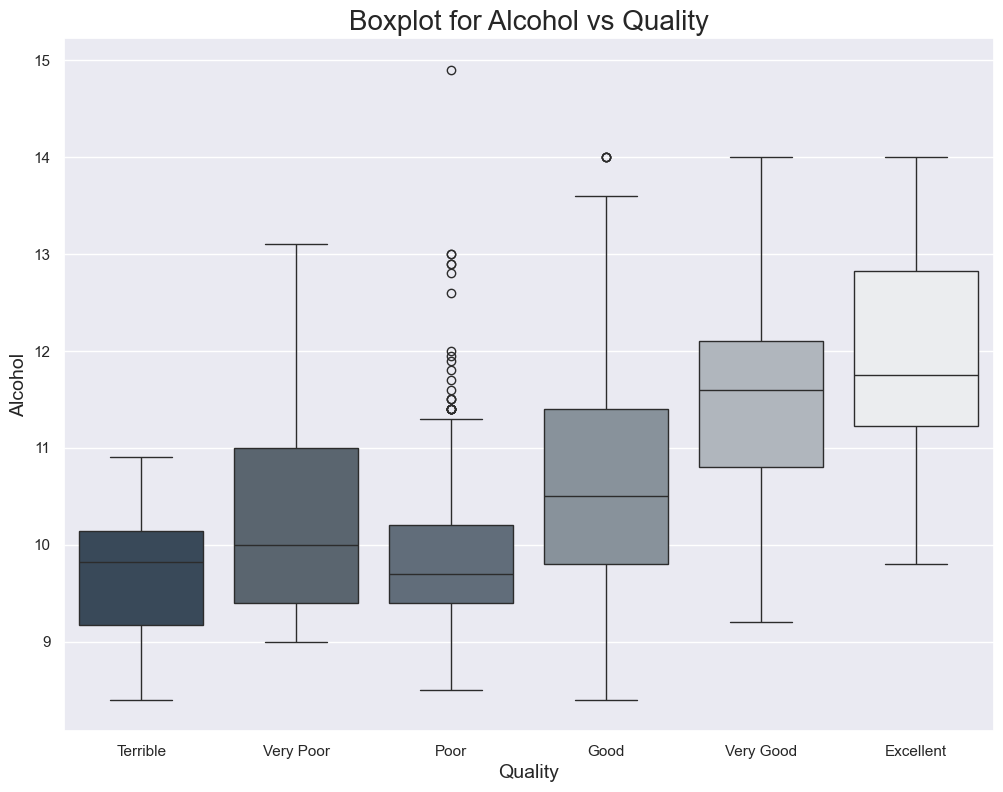

In [178]:
sns.set(rc={'figure.figsize':(12,9)})


ax=sns.boxplot(x="Quality Category", y="alcohol", data=df_category, palette=['#34495E','#566573', '#5D6D7E', '#85929E', '#AEB6BF','#EBEDEF'])
ax.set_title('Boxplot for Alcohol vs Quality', fontsize=20)
ax.set_xlabel('Quality',fontsize=14)
ax.set_ylabel('Alcohol',fontsize=14)

Text(0, 0.5, 'Citric Acid')

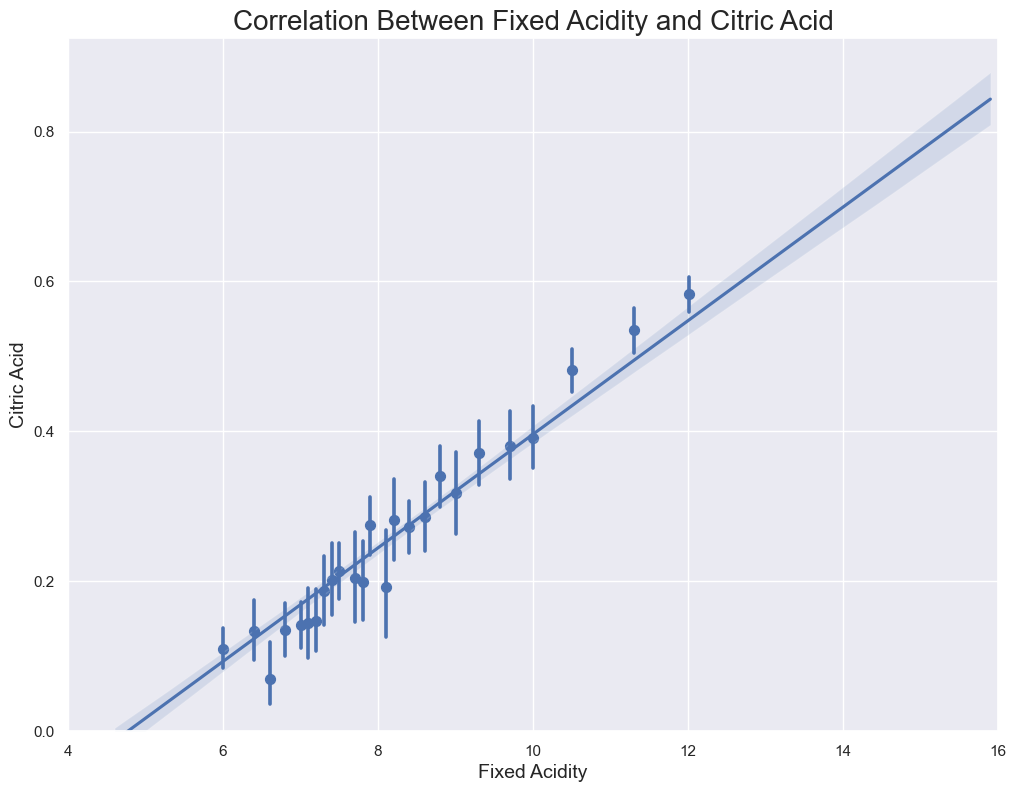

In [179]:
figsize=(22,20)

ax=sns.regplot(x="fixed acidity", y="citric acid", data=df,x_bins=25)

plt.xlim(4,16)
plt.ylim(0)
ax.set_title('Correlation Between Fixed Acidity and Citric Acid', fontsize=20)
ax.set_xlabel('Fixed Acidity',fontsize=14)
ax.set_ylabel('Citric Acid',fontsize=14)

Text(0, 0.5, 'pH')

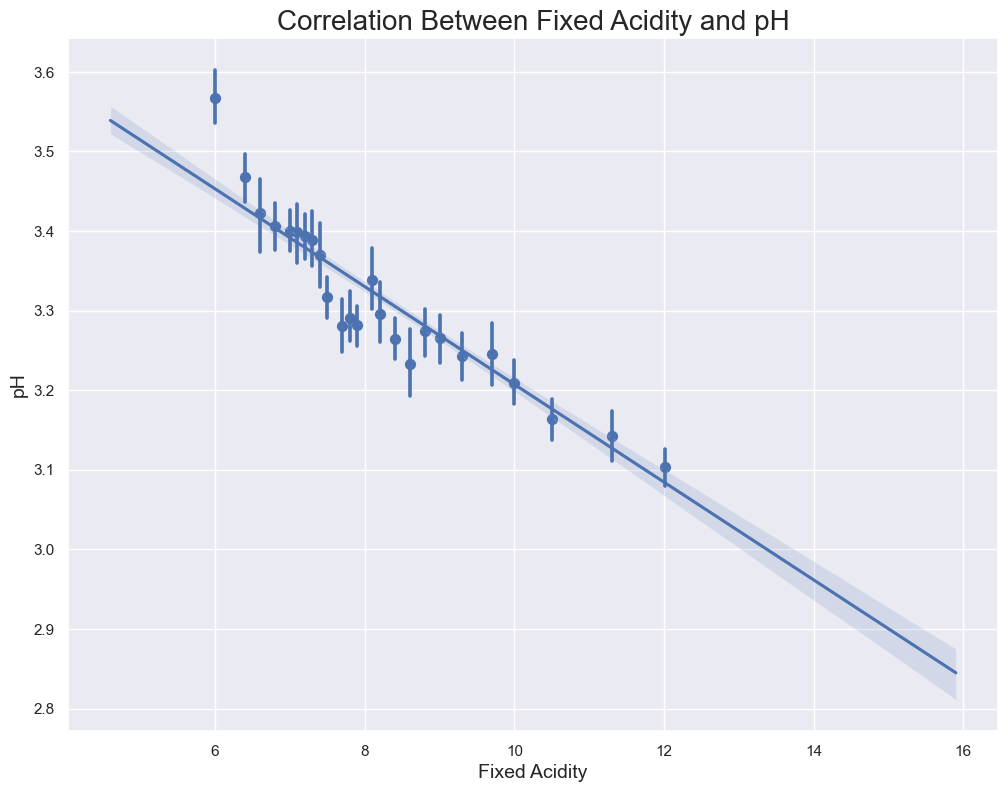

In [180]:
figsize=(22,20)

ax=sns.regplot(x="fixed acidity", y="pH", data=df,x_bins=25)


ax.set_title('Correlation Between Fixed Acidity and pH', fontsize=20)
ax.set_xlabel('Fixed Acidity',fontsize=14)
ax.set_ylabel('pH',fontsize=14)

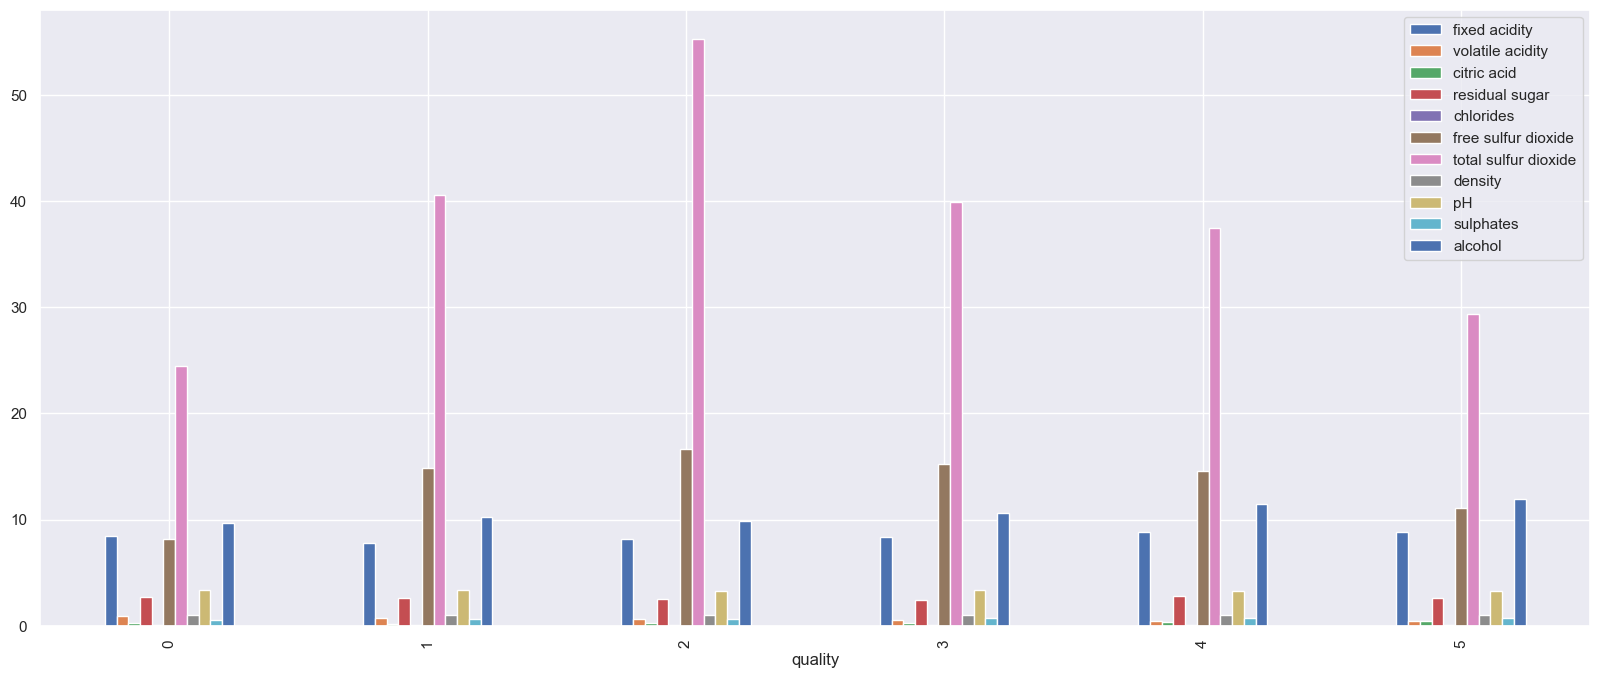

In [181]:
average=df.groupby("quality").mean()
average.plot(kind="bar",figsize=(20,8))
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_444\1848310876.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(x, shade=True, color='blue')


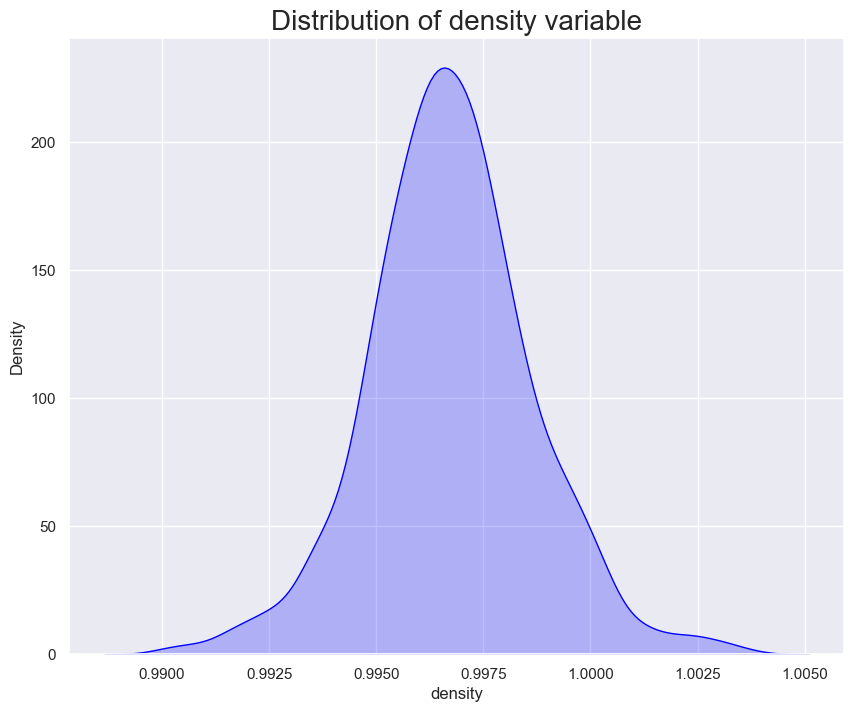

In [182]:
f, ax = plt.subplots(figsize=(10,8))
x = df['density']
x = pd.Series(x, name="density")
ax = sns.kdeplot(x, shade=True, color='blue')
ax.set_title("Distribution of density variable", fontsize=20)
plt.show()

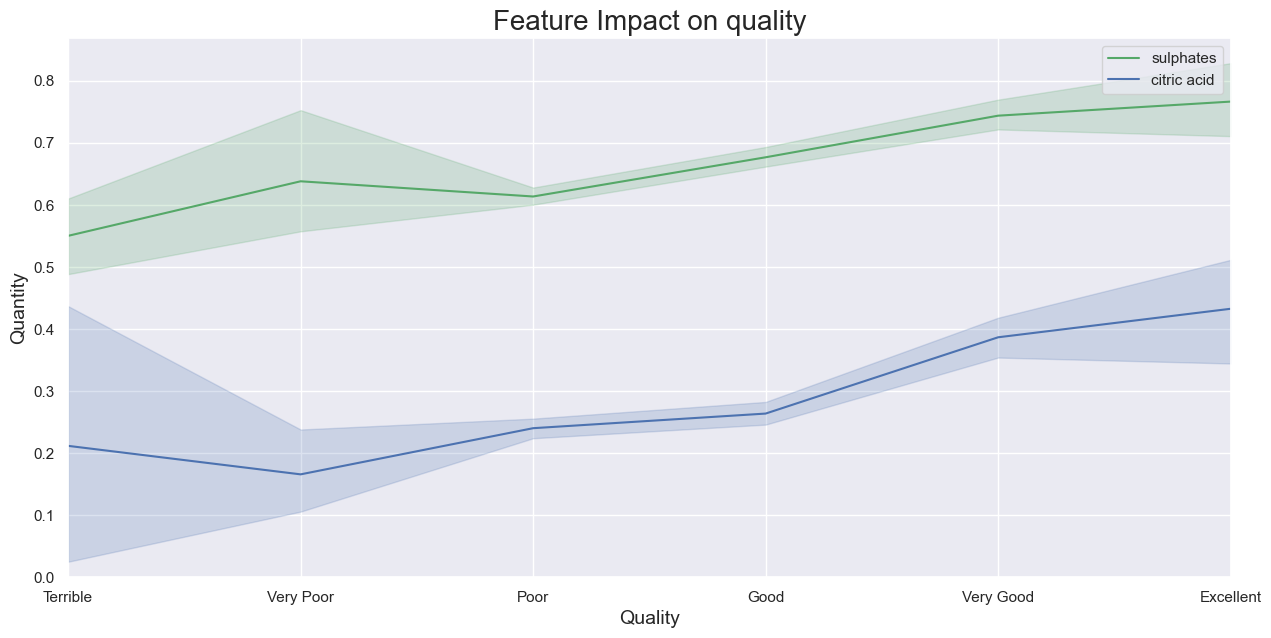

In [183]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df_category, x="Quality Category",y="sulphates",color="g", label="sulphates")
sns.lineplot(data=df_category, x="Quality Category",y="citric acid",color="b", label="citric acid")

plt.xlim(0,5)
plt.ylim(0)

plt.ylabel("Quantity", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.title("Feature Impact on quality", fontsize=20)
plt.legend()
plt.show()

## 3) Feature Importance (Random Forest)

In [184]:
X = df.drop(['quality'], axis=1)

y = df['quality']
# test_size=0.2 => %20 test, %80 train
# random_state=0 provides to have same results 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [185]:
X_train.shape, X_test.shape

((914, 11), (229, 11))

In [186]:
forest = RandomForestClassifier(n_estimators=500,random_state=0).fit(X_train, y_train)

# Predict the Test set results
y_pred = forest.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 1000 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 1000 decision-trees : 0.6812


### 3.1) Visualize Prediction Score

In [187]:
y_predict = list(forest.predict(X_test))
predicted_df = {'predicted_values': y_predict, 'original_values': y_test}
#creating new dataframe
predicted_df=pd.DataFrame(predicted_df)

In [188]:
predicted_df.head()

predicted_values  original_values
946                 2                2
142                 3                1
934                 2                3
625                 3                3
124                 2                2

In [189]:
predicted_df['original_values'].value_counts()


original_values
2    100
3     92
4     27
1      7
5      2
0      1
Name: count, dtype: int64

In [190]:
predicted_df['error']= ["correct" if row['original_values']==row['predicted_values'] else "incorrect" for index,row in predicted_df.iterrows()]

In [191]:
predicted_df=predicted_df.drop(['predicted_values'], axis=1)

(0.0, 105.0)

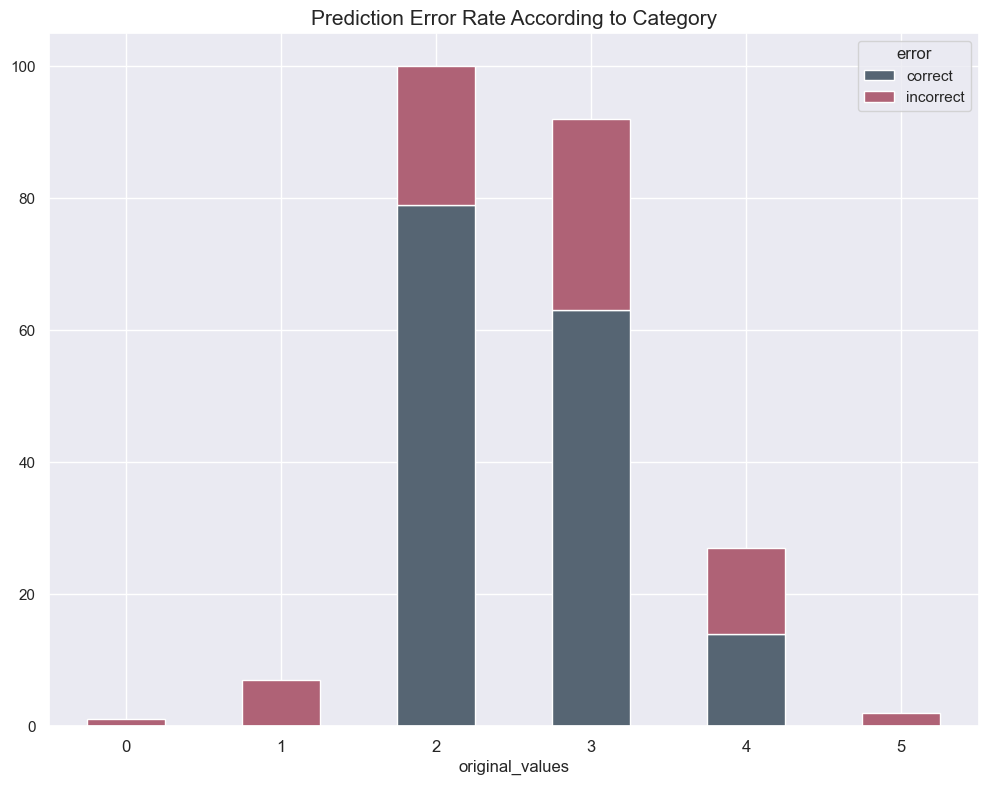

In [192]:
color= ['#566573', '#AF6276']
test = predicted_df.groupby(['original_values', 'error'])['original_values'].count().unstack('error').fillna(0)
test.plot(kind='bar', stacked=True, color=color)
plt.title('Prediction Error Rate According to Category', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.ylim(0)

### 3.2) Determine Feature Importance

In [193]:
feature_scores = pd.Series(forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

alcohol                 0.134208
sulphates               0.124398
volatile acidity        0.110071
total sulfur dioxide    0.105716
density                 0.087299
chlorides               0.082435
pH                      0.074610
citric acid             0.074129
fixed acidity           0.072921
residual sugar          0.069278
free sulfur dioxide     0.064934
dtype: float64

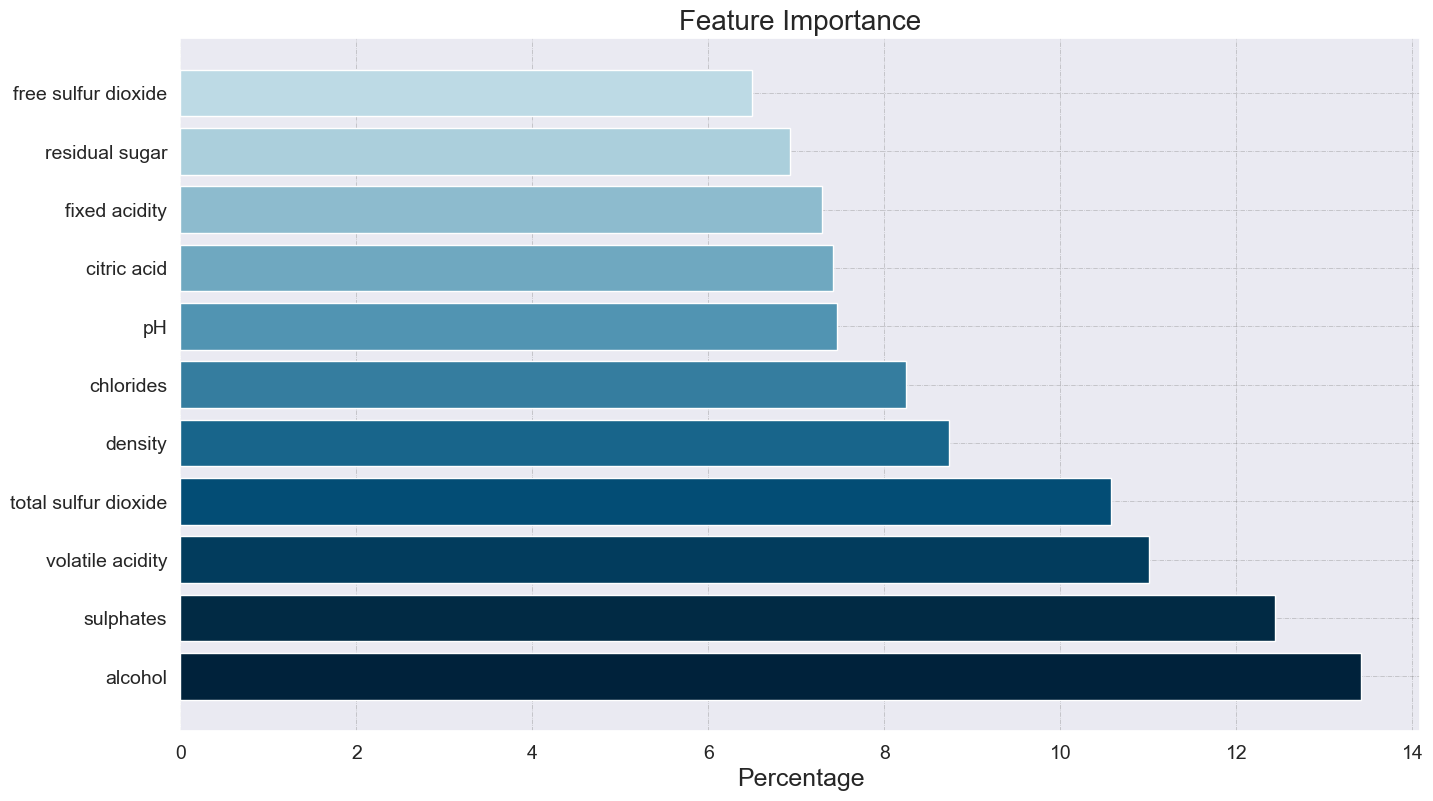

In [194]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.5)

colors = ['#00223b', '#012a44', '#023c5d', '#034d75', '#18658b', '#357d9f', '#5194b2', '#6fa8c0', '#8dbbce', '#abcfdc', '#bddae5']

feature_scores_perc = [per*100 for per in feature_scores]

# Horizontal Bar Plot
ax.barh(feature_scores.index, feature_scores_perc, color=colors)

ax.set_title('Feature Importance', fontsize=20)
ax.set_xlabel('Percentage', fontsize=18)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

plt.show()

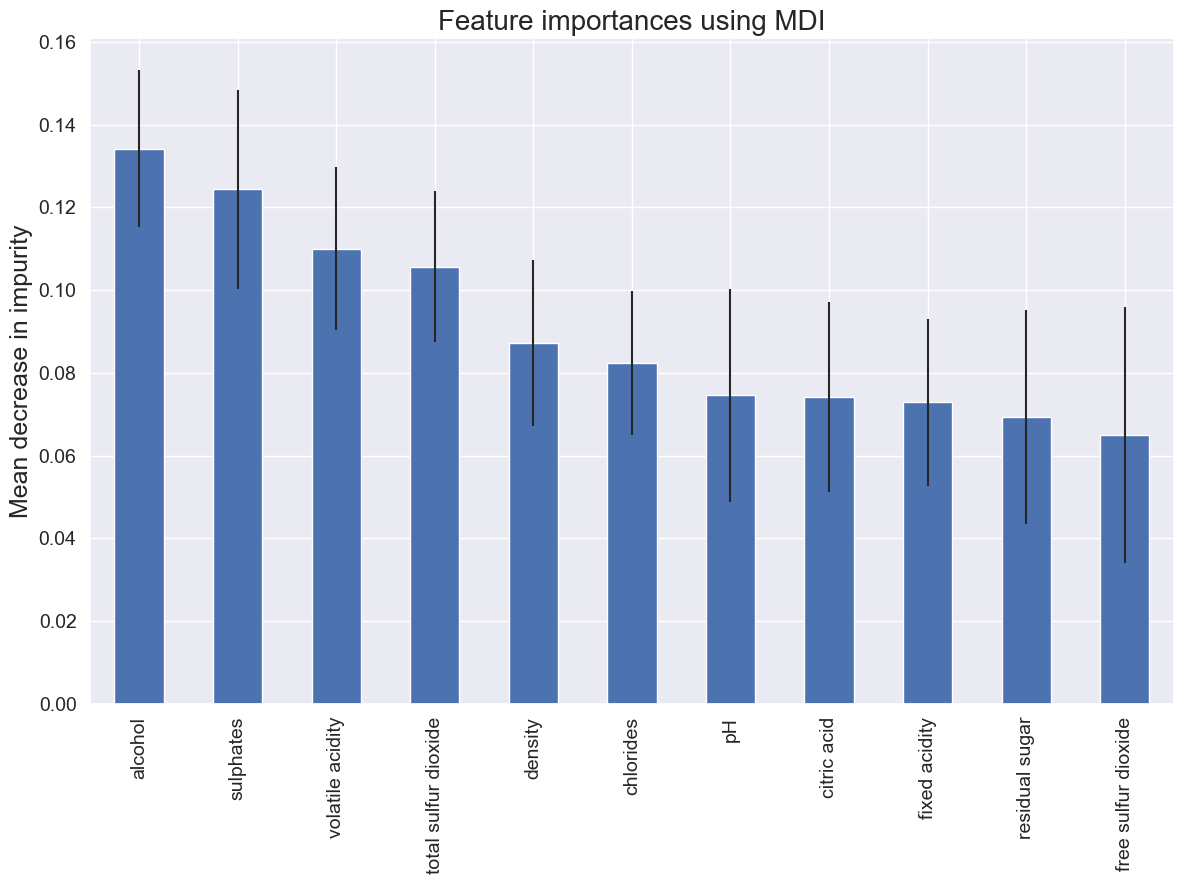

In [195]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

fig, ax = plt.subplots()
feature_scores.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI", fontsize=20)
ax.set_ylabel("Mean decrease in impurity", fontsize=18)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
fig.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


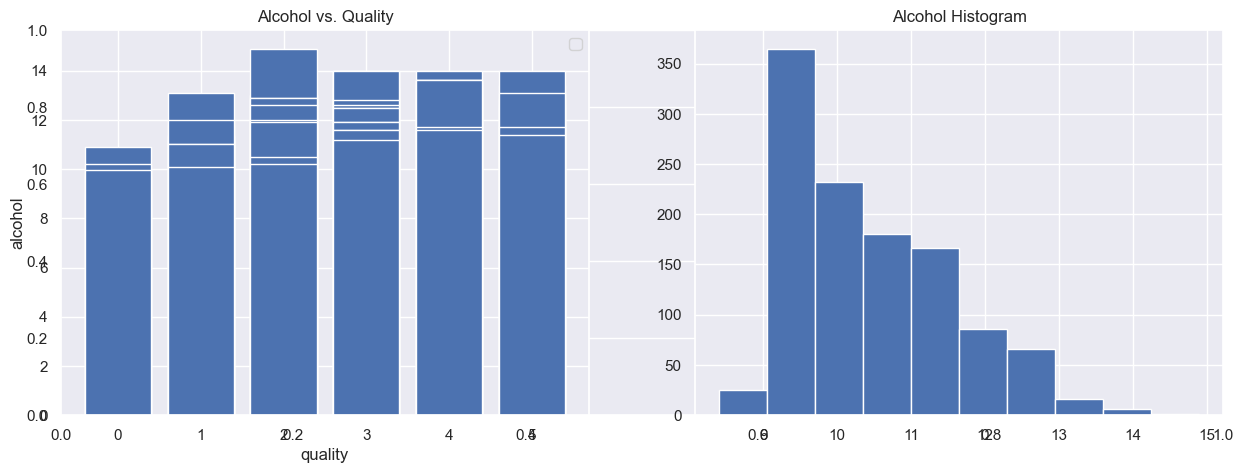

In [196]:
plt.subplots(figsize=(15, 5))


plt.subplot(1, 2, 1)
plt.bar(df['quality'], df['alcohol'])
plt.title('Alcohol vs. Quality')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df['alcohol'])
plt.title("Alcohol Histogram")
plt.show()

## 4) Yes or No Categorization

In [197]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normal_df = scaler.fit_transform(df)
normal_df = pd.DataFrame(normal_df, columns = df.columns)
print(normal_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.149254              0.098940  0.567548  0.606299   0.137725   
1             0.358209              0.215548  0.494126  0.362205   0.209581   
2             0.208955              0.169611  0.508811  0.409449   0.191617   
3             0.238806              0.190813  0.582232  0.330709   0.149701   
4             0.149254              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846      0.4  
1  0.21538

In [198]:
df_yn=df.copy()
df_yn["good wine"] = ["yes" if i >= 3 else "no" for i in df_yn['quality']]


In [199]:
X = df_yn.drop(["quality"], axis = 1)
y = df_yn["good wine"]

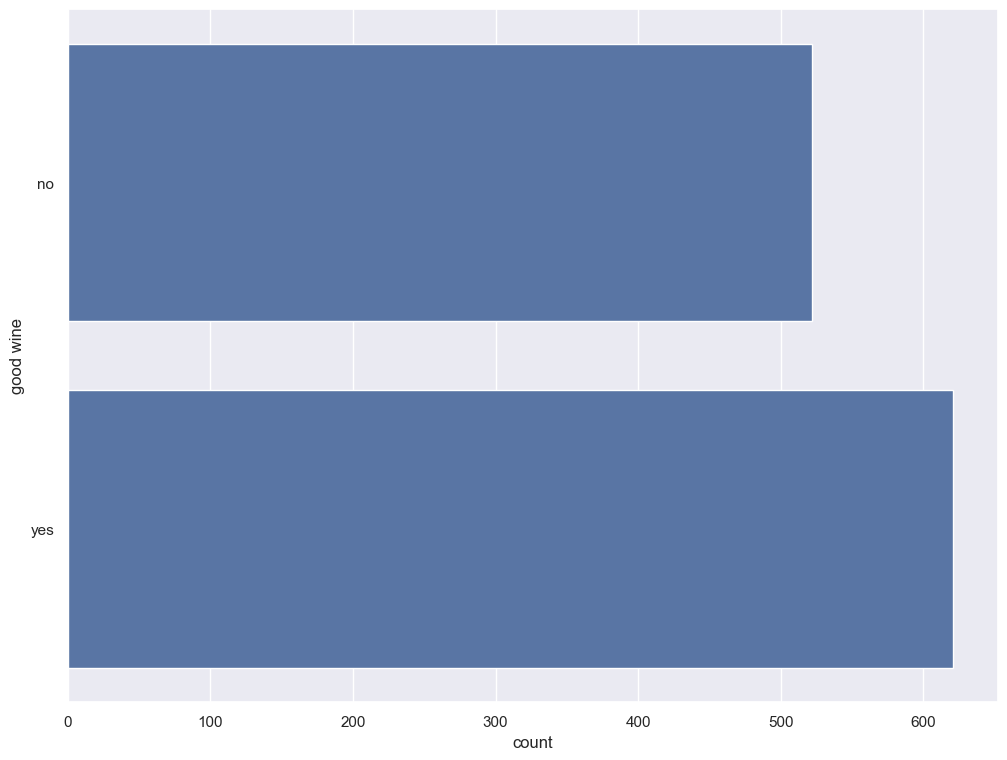

In [200]:
sns.countplot(y)
plt.show()

# 5) MODELLING

In [201]:
model_comparison={}
rf_feature_imp={}

## 5.1) NORMALIZED DATA

In [202]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df_drop_quality=df.drop(['quality'], axis=1)
normal_df = scaler.fit_transform(df_drop_quality)
normal_df = pd.DataFrame(normal_df, columns = df_drop_quality.columns)
normal_df['quality']=df['quality']
X1 = normal_df.drop(['quality'], axis=1)
y1 = normal_df['quality']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [203]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)

In [204]:
# random_state=0, n_estimators default=100
forest = RandomForestClassifier(random_state=0).fit(X_train1, y_train1)
y_pred = forest.predict(X_test1)
print('Model accuracy score : {0:0.2f}%'. format(accuracy_score(y_test1, y_pred)*100))

scores = cross_val_score(forest, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1)
print("Mean Accuracy: %.2f%%, Standard Deviation: (%.2f%%)" % (scores.mean()*100.0, scores.std()*100.0))

Model accuracy score : 67.25%
Mean Accuracy: 67.36%, Standard Deviation: (2.62%)


## 5.2) RANDOM FOREST - TUNING MODEL

In [205]:
X = df.drop(['quality'], axis=1)

y = df['quality']
# test_size=0.2 => %20 test, %80 train
# random_state=0 provides to have same results 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [206]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)

In [207]:
# Finding best parameters to tune randomforestclassfier()

parameters = {'min_samples_split': [2,5], 'max_features':[1,5], 'max_depth':[14,24]}

rf = RandomForestClassifier()

print('Paramaters:', rf.get_params())

clf = GridSearchCV(rf, parameters, cv=10).fit(X_train, y_train)

print(f'Best Hyperparameters: {clf.best_params_}')

Paramaters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Best Hyperparameters: {'max_depth': 24, 'max_features': 5, 'min_samples_split': 2}


### Controlling RandomForestClassifier() Tuning 

In [208]:
# random_state=0, n_estimators default=100
forest = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_pred = forest.predict(X_test)
print('Model accuracy score : {0:0.2f}%'. format(accuracy_score(y_test, y_pred)*100))

scores = cross_val_score(forest, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("Mean Accuracy: %.2f%%, Standard Deviation: (%.2f%%)" % (scores.mean()*100.0, scores.std()*100.0))

Model accuracy score : 67.25%
Mean Accuracy: 67.19%, Standard Deviation: (2.50%)


In [209]:
# random_state=0, n_estimators=500, max_depth=14
forest = RandomForestClassifier(n_estimators=500,max_depth=14, random_state=0).fit(X_train, y_train)
y_pred = forest.predict(X_test)
print('Model accuracy score : {0:0.2f}%'. format(accuracy_score(y_test, y_pred)*100))

scores = cross_val_score(forest, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("Mean Accuracy: %.2f%%, Standard Deviation: (%.2f%%)" % (scores.mean()*100.0, scores.std()*100.0))

Model accuracy score : 69.00%
Mean Accuracy: 67.45%, Standard Deviation: (2.07%)


In [210]:
# random_state=0, n_estimators=500, max_depth=14, min_samples_split=3, max_features=1
forest = RandomForestClassifier(n_estimators=500,max_depth=14, random_state=0, min_samples_split=2, max_features=5).fit(X_train, y_train)
y_pred = forest.predict(X_test)
print('Model accuracy score : {0:0.2f}%'. format(accuracy_score(y_test, y_pred)*100))

scores = cross_val_score(forest, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("Mean Accuracy: %.2f%%, Standard Deviation: (%.2f%%)" % (scores.mean()*100.0, scores.std()*100.0))

Model accuracy score : 68.56%
Mean Accuracy: 67.19%, Standard Deviation: (2.12%)


param_dist = {"max_depth": range(1,15),
              "max_features": range(1,10),
              "criterion": ["gini", "entropy"],
              "min_samples_split": range(1,5)}
              
forest_cv = GridSearchCV(forest, param_dist, cv=5)

forest_cv.fit(X_train,y_train)

print(forest_cv.best_params_)

#Result: {'criterion': 'gini', 'max_depth': 14, 'max_features': 1, 'min_samples_split': 2}

In [211]:
model_comparison['Random Forest']=[scores.mean()*100.0,scores.std()*100.0]
rf_feature_imp['Random Forest']=[scores.mean()*100.0,scores.std()*100.0]

### Random Forest Parameter Observations

**min_impurity_decrease** - no impact even though it is selected as 0.0000001

**criterion="entropy"** - decreases accuracy to 0.6681

**min_samples_leaf** - if 1 same, if higher decreases

**max_features** - does not affect result

**max_leaf_nodes** - 0.6943 when it is higher than 300

**max_samples** - not significant effect

**balanced_subsample** - decreases

**oob_score** - not effect

## 5.3) DECISION TREE - TUNING MODEL

In [212]:
# Finding best parameters to tune randomforestclassfier()

parameters = {'min_samples_split': [2,5], 'max_features':[1,5], 'max_depth':[14,24]}

rf = DecisionTreeClassifier()

print('Paramaters:', rf.get_params())

clf = GridSearchCV(rf, parameters, cv=10).fit(X_train, y_train)

print(f'Best Hyperparameters: {clf.best_params_}')

Paramaters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Best Hyperparameters: {'max_depth': 24, 'max_features': 5, 'min_samples_split': 2}


In [213]:
decision_tree=DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
y_pred = decision_tree.predict(X_test)
print('Model accuracy score : {0:0.2f}%'. format(accuracy_score(y_test, y_pred)*100))

scores = cross_val_score(decision_tree, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("Mean Accuracy: %.2f%%, Standard Deviation: (%.2f%%)" % (scores.mean()*100.0, scores.std()*100.0))

Model accuracy score : 61.57%
Mean Accuracy: 59.40%, Standard Deviation: (3.76%)


In [214]:
decision_tree=DecisionTreeClassifier(random_state=0, max_depth=14, max_features=5, min_samples_split=2).fit(X_train,y_train)
y_pred = decision_tree.predict(X_test)
print('Model accuracy score : {0:0.2f}%'. format(accuracy_score(y_test, y_pred)*100))

scores = cross_val_score(decision_tree, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("Mean Accuracy: %.2f%%, Standard Deviation: (%.2f%%)" % (scores.mean()*100.0, scores.std()*100.0))

Model accuracy score : 55.46%
Mean Accuracy: 56.95%, Standard Deviation: (3.31%)


In [215]:
model_comparison['Decision Tree']=[scores.mean()*100.0,scores.std()*100.0]

### Decision Tree Parameter Observations

**criterion:** as entropy decreases accuracy

**splitter:** as random changes accuracy between 0.58-0.62

**max_depth:** does not increase the accuracy but decrease according to value

**max_leaf_nodes:** does not increase but decrease

**class_weight:** deacreases accuracy

**min_impurity_decrease:** decreases accuracy

**ccp_alpha:** does not increase but decrease

## 5.4) SCV - MODEL TUNING

In [216]:
svc = svm.SVC(random_state=0).fit(X_train, y_train)
print('Model accuracy score : {0:0.2f}%'. format(svc.score(X_test, y_test)*100))
scores = cross_val_score(svc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("Mean Accuracy: %.2f%%, Standard Deviation: (%.2f%%)" % (scores.mean()*100.0, scores.std()*100.0))

Model accuracy score : 51.53%
Mean Accuracy: 50.74%, Standard Deviation: (3.39%)


In [217]:
# linear is best option
svc = svm.SVC(kernel='linear', random_state=42).fit(X_train, y_train)
print('Model accuracy score : {0:0.2f}%'. format(svc.score(X_test, y_test)*100))
cv = KFold(n_splits=10, random_state=0, shuffle=True)
scores = cross_val_score(svc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("Mean Accuracy: %.2f%%, Standard Deviation: (%.2f%%)" % (scores.mean()*100.0, scores.std()*100.0))

Model accuracy score : 65.50%
Mean Accuracy: 58.43%, Standard Deviation: (5.78%)


In [218]:
model_comparison['SVC']=[scores.mean()*100.0,scores.std()*100.0]

## 5.5) MODEL COMPARIOSN

In [219]:
df_comparison = pd.DataFrame.from_dict(model_comparison).T
df_comparison.columns = ['Mean Accuracy', 'Standard Deviation']
df_comparison = df_comparison.sort_values('Mean Accuracy', ascending=True)
df_comparison.style.background_gradient(cmap='Blues')

# 6) INCREASING ACCURACY - DROP LEAST IMPORTANT FEATURES

In [235]:
cv10 = KFold(n_splits=10, random_state=0, shuffle=True)
cv5 = KFold(n_splits=5, random_state=0, shuffle=True)
cv15 = KFold(n_splits=15, random_state=0, shuffle=True)
cv20 = KFold(n_splits=20, random_state=0, shuffle=True)
cv25 = KFold(n_splits=25, random_state=0, shuffle=True)

## 6.1) DROPPING LEAST IMPORTANT FEATURES

In [221]:
X_train1 = X_train.drop(['residual sugar'],axis=1)
X_test1 = X_test.drop(['residual sugar'],axis=1)
tree=RandomForestClassifier(n_estimators=500,max_depth=14, random_state=0, min_samples_split=2, max_features=1).fit(X_train1,y_train)
scores = cross_val_score(tree, X, y, scoring='accuracy', cv=cv10, n_jobs=-1)
print("Mean Accuracy: %.2f%%, Standard Deviation: (%.2f%%)" % (scores.mean()*100.0, scores.std()*100.0))

Mean Accuracy: 67.09%, Standard Deviation: (3.44%)


In [222]:
X_train1 = X_train1.drop(['free sulfur dioxide'],axis=1)
X_test1 = X_test1.drop(['free sulfur dioxide'],axis=1)
tree=RandomForestClassifier(n_estimators=500,max_depth=14, random_state=0, min_samples_split=2, max_features=1).fit(X_train1,y_train)
scores = cross_val_score(tree, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("Mean Accuracy: %.2f%%, Standard Deviation: (%.2f%%)" % (scores.mean()*100.0, scores.std()*100.0))

Mean Accuracy: 67.09%, Standard Deviation: (3.44%)


## 6.2) PIPELINE

In [223]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=500,max_depth=14, random_state=0, min_samples_split=2, max_features=1),n_estimators=50,learning_rate=1.0, algorithm='SAMME')
clf.fit(X_train, y_train)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))

Mean Accuracy: 66.842%, Standard Deviation: (3.114%)


In [224]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=500,max_depth=14, random_state=0, min_samples_split=2, max_features=1))

pipeline.fit(X_train, y_train)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))

Mean Accuracy: 66.400%, Standard Deviation: (3.227%)


## 6.3) ADDIG NEW DATASET TO INCREASE DATASET SIZE

In [250]:
df_new= pd.read_csv("./Wine_Quality_Classification/wineQualityReds.csv")
df_new=df_new.drop(['Unnamed: 0'], axis=1)
df_new.rename(columns = {'fixed.acidity':'fixed acidity', 'volatile.acidity':'volatile acidity', 'citric.acid':'citric acid', 'residual.sugar':'residual sugar', 'free.sulfur.dioxide':'free sulfur dioxide', 'total.sulfur.dioxide':'total sulfur dioxide'}, inplace = True)
df_new.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [260]:
df_combine_no_scale = pd.concat([df,df_new])
df_combine_no_scale.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        2  
1      9.8        2  
2      9.8        2  
3      9.8        3  
4      9.4        2

In [261]:
df_combine_no_scale.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2742 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         2742 non-null   float64
 1   volatile acidity      2742 non-null   float64
 2   citric acid           2742 non-null   float64
 3   residual sugar        2742 non-null   float64
 4   chlorides             2742 non-null   float64
 5   free sulfur dioxide   2742 non-null   float64
 6   total sulfur dioxide  2742 non-null   float64
 7   density               2742 non-null   float64
 8   pH                    2742 non-null   float64
 9   sulphates             2742 non-null   float64
 10  alcohol               2742 non-null   float64
 11  quality               2742 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 278.5 KB


C:\Users\Admin\AppData\Local\Temp\ipykernel_444\4285199761.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax[1] = sns.countplot(x="Quality Category", data=df_combine_category, order = df_combine_category['Quality Category'].value_counts().index, palette=['#b5c6e0','#becee4', '#c7d5e7', '#d0ddeb', '#d9e5ee','#ebf4f5'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_444\4285199761.py:10: UserWarning: 
The palette list has fewer values (6) than needed (9) and will cycle, which may produce an uninterpretable plot.
  ax[1] = sns.countplot(x="Quality Category", data=df_combine_category, order = df_combine_category['Quality Category'].value_counts().index, palette=['#b5c6e0','#becee4', '#c7d5e7', '#d0ddeb', '#d9e5ee','#ebf4f5'])


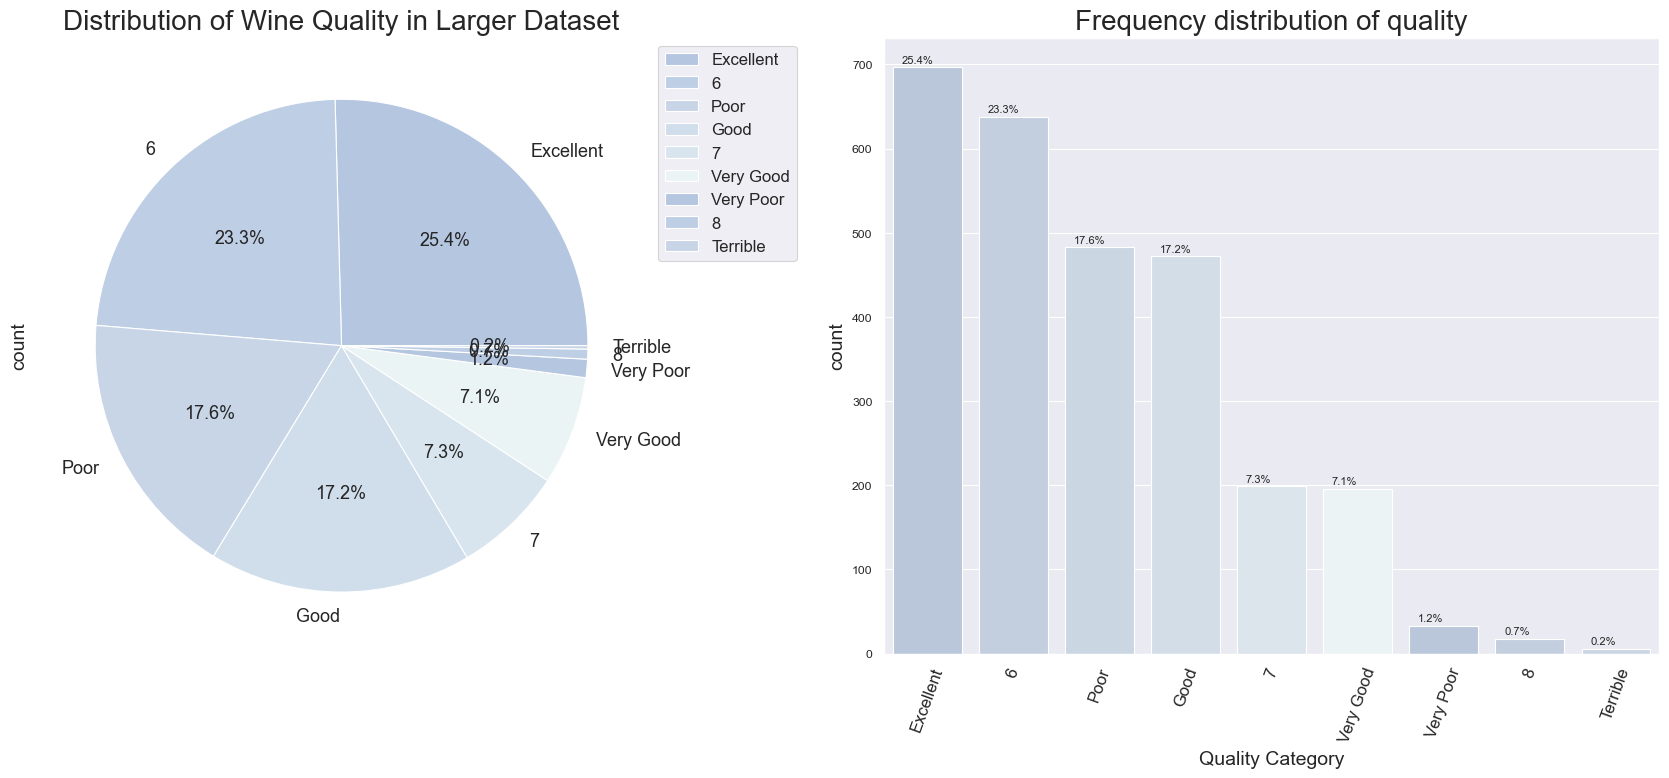

In [253]:
f,ax=plt.subplots(1,2,figsize=(22,8))

ax[0] = df_combine_category["Quality Category"].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], fontsize=13, colors = ['#b5c6e0','#becee4', '#c7d5e7', '#d0ddeb', '#d9e5ee','#ebf4f5'])
ax[0].set_title("Distribution of Wine Quality in Larger Dataset", fontsize=20)
ax[0].legend(bbox_to_anchor=(1, 1), fontsize=12)



#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="Quality Category", data=df_combine_category, order = df_combine_category['Quality Category'].value_counts().index, palette=['#b5c6e0','#becee4', '#c7d5e7', '#d0ddeb', '#d9e5ee','#ebf4f5'])
ax[1].set_title("Frequency distribution of quality", fontsize=20)

for p in ax[1].patches:
    ax[1].annotate('{:.1f}%'.format(100*p.get_height()/len(df_combine_category['Quality Category'])), (p.get_x()+0.1, p.get_height()+5))

plt.xticks(rotation=70,fontsize=12)
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":20,"axes.labelsize":14})   

plt.show()

In [254]:
X = df_combine.drop(['quality'], axis=1)
y = df_combine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
forest = RandomForestClassifier(n_estimators=500,max_depth=14, random_state=0, min_samples_split=2, max_features=1)

In [258]:
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

print('Model accuracy score with 1000 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

scores = cross_val_score(forest, X, y, scoring='accuracy', cv=cv10, n_jobs=-1)
print("Mean Accuracy with cv = 10 splits: %.3f%%, Standard Deviation: (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))

scores = cross_val_score(forest, X, y, scoring='accuracy', cv=cv5, n_jobs=-1)
print("Mean Accuracy with cv = 5 splits: %.3f%%, Standard Deviation: (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))

scores = cross_val_score(forest, X, y, scoring='accuracy', cv=cv15, n_jobs=-1)
print("Mean Accuracy with cv = 15 splits: %.3f%%, Standard Deviation: (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))

scores = cross_val_score(forest, X, y, scoring='accuracy', cv=cv20, n_jobs=-1)
print("Mean Accuracy with cv = 20 splits: %.3f%%, Standard Deviation: (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))

scores = cross_val_score(forest, X, y, scoring='accuracy', cv=cv25, n_jobs=-1)
print("Mean Accuracy with cv = 25 splits: %.3f%%, Standard Deviation: (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))

Model accuracy score with 1000 decision-trees : 0.1858
Mean Accuracy with cv = 10 splits: 16.592%, Standard Deviation: (2.085%)
Mean Accuracy with cv = 5 splits: 19.074%, Standard Deviation: (1.803%)
Mean Accuracy with cv = 15 splits: 16.154%, Standard Deviation: (2.504%)
Mean Accuracy with cv = 20 splits: 15.388%, Standard Deviation: (2.984%)
Mean Accuracy with cv = 25 splits: 15.313%, Standard Deviation: (3.349%)


In [257]:
df_new["quality"] = df_new["quality"] - 3

df_combine_category=df_combine.copy()
df_combine_category["Quality Category"]=df_combine_category["quality"]
df_combine_category["Quality Category"].replace({0: "Terrible", 1: "Very Poor", 2: "Poor", 3: "Good", 4: "Very Good", 5: "Excellent"}, inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_444\3534949101.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combine_category["Quality Category"].replace({0: "Terrible", 1: "Very Poor", 2: "Poor", 3: "Good", 4: "Very Good", 5: "Excellent"}, inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_444\4285199761.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax[1] = sns.countplot(x="Quality Category", data=df_combine_category, order = df_combine_category['Quality Category'].value_counts().index, palette=['#b5c6e0','#becee4', '#c7d5e7', '#d0ddeb', '#d9e5ee','#ebf4f5'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_444\4285199761.py:10: UserWarning: 
The palette list has fewer values (6) than needed (9) and will cycle, which may produce an uninterpretable plot.
  ax[1] = sns.countplot(x="Quality Category", data=df_combine_category, order = df_combine_category['Quality Category'].value_counts().index, palette=['#b5c6e0','#becee4', '#c7d5e7', '#d0ddeb', '#d9e5ee','#ebf4f5'])


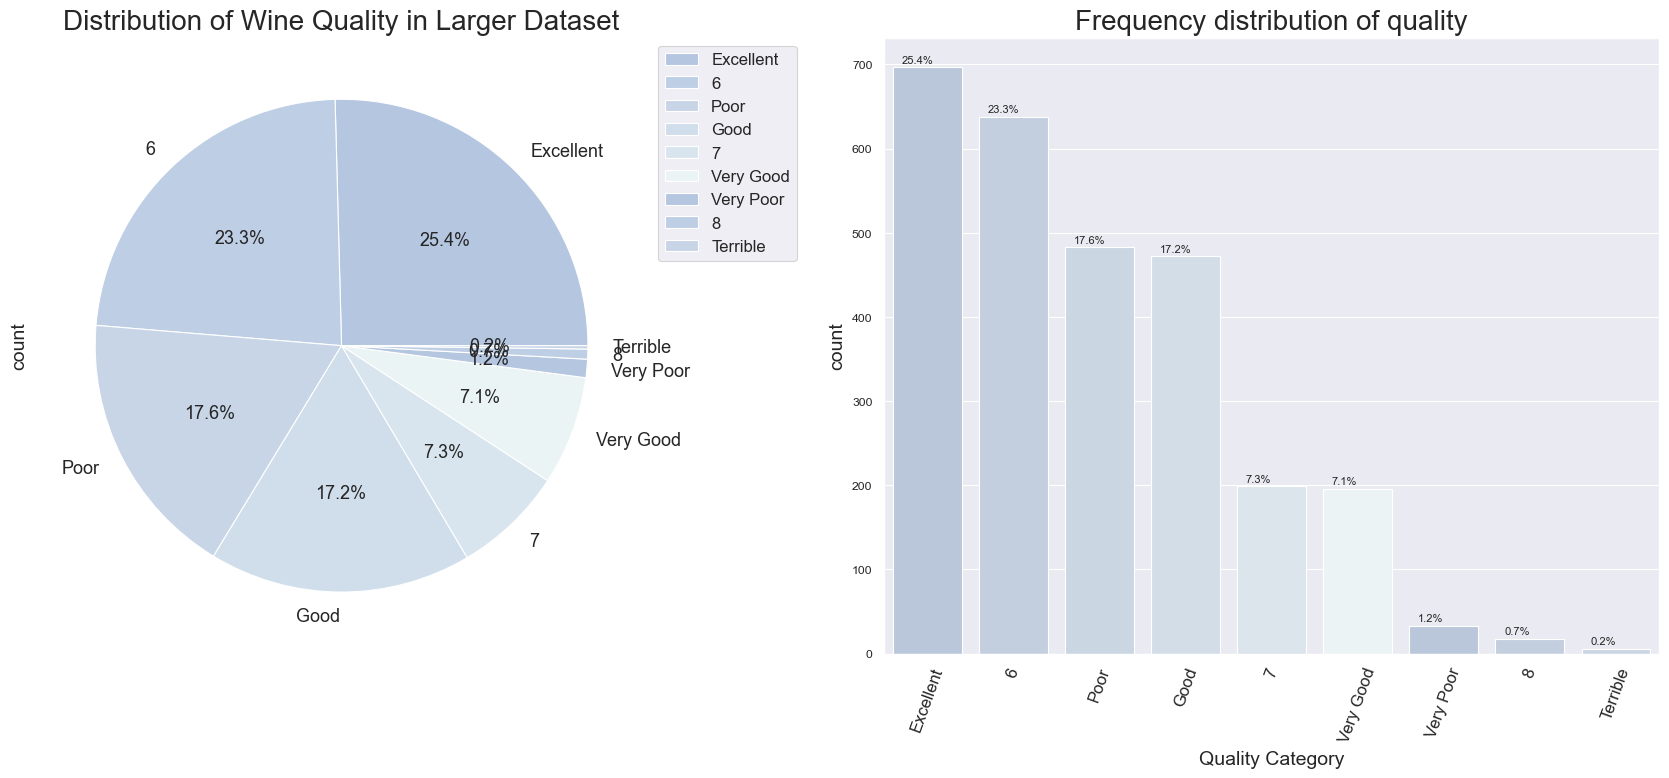

In [259]:
f,ax=plt.subplots(1,2,figsize=(22,8))

ax[0] = df_combine_category["Quality Category"].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], fontsize=13, colors = ['#b5c6e0','#becee4', '#c7d5e7', '#d0ddeb', '#d9e5ee','#ebf4f5'])
ax[0].set_title("Distribution of Wine Quality in Larger Dataset", fontsize=20)
ax[0].legend(bbox_to_anchor=(1, 1), fontsize=12)



#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="Quality Category", data=df_combine_category, order = df_combine_category['Quality Category'].value_counts().index, palette=['#b5c6e0','#becee4', '#c7d5e7', '#d0ddeb', '#d9e5ee','#ebf4f5'])
ax[1].set_title("Frequency distribution of quality", fontsize=20)

for p in ax[1].patches:
    ax[1].annotate('{:.1f}%'.format(100*p.get_height()/len(df_combine_category['Quality Category'])), (p.get_x()+0.1, p.get_height()+5))

plt.xticks(rotation=70,fontsize=12)
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":20,"axes.labelsize":14})   

plt.show()

In [243]:
X = df_combine.drop(['quality'], axis=1)
y = df_combine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
forest = RandomForestClassifier(n_estimators=500,max_depth=14, random_state=0, min_samples_split=2, max_features=1)

In [244]:
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

print('Model accuracy score with 1000 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

scores = cross_val_score(forest, X, y, scoring='accuracy', cv=cv10, n_jobs=-1)
print("Mean Accuracy with cv = 10 splits: %.3f%%, Standard Deviation: (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))

scores = cross_val_score(forest, X, y, scoring='accuracy', cv=cv5, n_jobs=-1)
print("Mean Accuracy with cv = 5 splits: %.3f%%, Standard Deviation: (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))

scores = cross_val_score(forest, X, y, scoring='accuracy', cv=cv15, n_jobs=-1)
print("Mean Accuracy with cv = 15 splits: %.3f%%, Standard Deviation: (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))

scores = cross_val_score(forest, X, y, scoring='accuracy', cv=cv20, n_jobs=-1)
print("Mean Accuracy with cv = 20 splits: %.3f%%, Standard Deviation: (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))

scores = cross_val_score(forest, X, y, scoring='accuracy', cv=cv25, n_jobs=-1)
print("Mean Accuracy with cv = 25 splits: %.3f%%, Standard Deviation: (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))

Model accuracy score with 1000 decision-trees : 0.1931
Mean Accuracy with cv = 10 splits: 16.592%, Standard Deviation: (2.085%)
Mean Accuracy with cv = 5 splits: 19.074%, Standard Deviation: (1.803%)
Mean Accuracy with cv = 15 splits: 16.154%, Standard Deviation: (2.504%)
Mean Accuracy with cv = 20 splits: 15.388%, Standard Deviation: (2.984%)
Mean Accuracy with cv = 25 splits: 15.313%, Standard Deviation: (3.349%)
